In [1]:
class FoldiakNetwork:
    def __init__(self, m, n, alpha=0.1, beta=0.02, gamma=0.02, lambd=10, p=1/8, num_epochs=1200):
        self.m = m
        self.n = n
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.lambd = lambd
        self.p = p
        self.num_epochs = num_epochs

        self.q = np.random.rand(n, m)
        self.w = np.zeros((n, n))
        self.t = np.random.rand(n)

        self.q_history = []

    def f(self, u):
        return 1/(1 + np.exp(-self.lambd*u))

    def initialize_thresholds(self, X, init_iters=100, init_gamma=0.1):
        original_alpha, original_beta, original_gamma = self.alpha, self.beta, self.gamma
        self.alpha, self.beta, self.gamma = 0, 0, init_gamma

        for _ in range(init_iters):
            for x in X:
                self.update(x)

        self.alpha, self.beta, self.gamma = original_alpha, original_beta, original_gamma

    def update(self, x, dt=0.01, iters=100):
        y = np.random.rand(self.n)

        for _ in range(iters):
            y_dot = self.f(np.dot(self.q, x) + np.dot(self.w, y) - self.t) - y
            y += dt*y_dot

        y_final = np.round(y).astype(int)

        self.w += -self.alpha * np.outer(y_final - self.p, y_final - self.p)
        np.fill_diagonal(self.w, 0)
        self.w = np.clip(self.w, a_min=0, a_max=None)

        self.q += self.beta * np.outer(y_final, (x - np.dot(self.q.T, y_final)))
        self.q_history.append(self.q.copy())
        
        self.t += self.gamma * (y_final - self.p)

        return y_final

    def train(self, X):
        self.initialize_thresholds(X)
        for epoch in range(self.num_epochs):
            for x in X:
                self.update(x)
    def transform(self, x):
        """Compute the output for a given input, without thresholding."""
        y = self.q @ x - self.t
        return y



## Part 1: Figure Recreation

In [2]:
import numpy as np

def generate_bars(num_samples, size, p):
    data = np.zeros((num_samples, size, size))

    # Generate horizontal and verticla bars
    for sample in range(num_samples):
        for i in range(size):
            if np.random.uniform(0, 1) < p:
                data[sample, i, :] = 1
            if np.random.uniform(0, 1) < p:
                data[sample, :, i] = 1

    return data

num_samples = 100 #1000
size = 8
p = 1/8 
data = generate_bars(num_samples, size, p)


In [3]:

network = FoldiakNetwork(m=size*size, n=16) #64, 16 

# flatten
input_patterns = data.reshape(num_samples, -1)

# train
network.train(input_patterns)


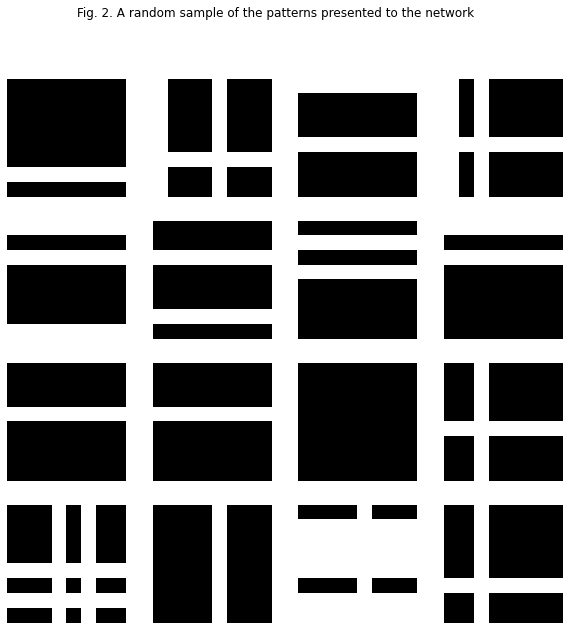

In [4]:
import matplotlib.pyplot as plt

# Plot a random sample of the patterns presented to the network
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(data[i], cmap='gray')
    plt.axis('off')
plt.suptitle('Fig. 2. A random sample of the patterns presented to the network')
plt.show()

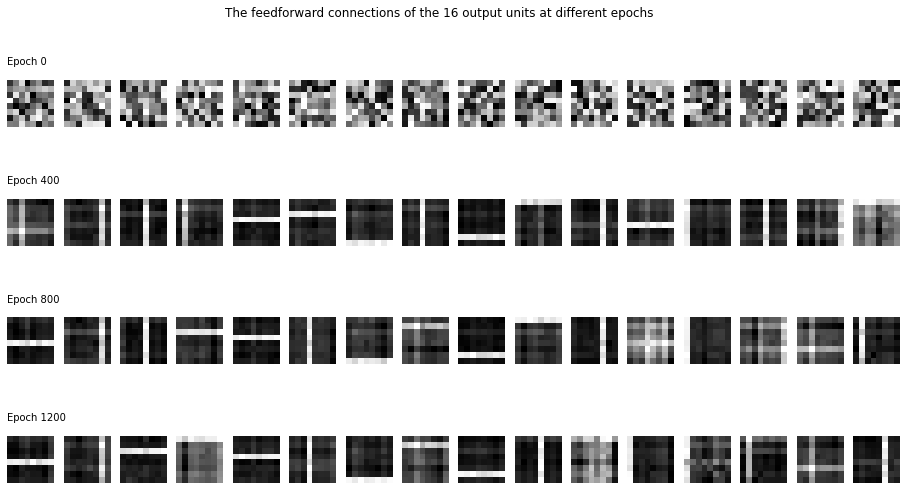

In [5]:

display_epochs = [0, 400, 800, 1200]
display_indices = [epoch * num_samples for epoch in display_epochs]


fig, axs = plt.subplots(len(display_epochs), 16, figsize=(16, len(display_epochs)*2))
plt.subplots_adjust(hspace=0.5)

for i, index in enumerate(display_indices):
    for j in range(16):
        axs[i, j].imshow(network.q_history[index][j].reshape(int(np.sqrt(network.m)), int(np.sqrt(network.m))), cmap='gray')
        axs[i, j].axis('off')

    axs[i, 0].text(0, 1.5, f'Epoch {display_epochs[i]}', transform=axs[i, 0].transAxes, va='top')

plt.suptitle('The feedforward connections of the 16 output units at different epochs')
plt.show()


## Part 2: Hyperparameter Exploration

Running simulation with p=0.125, size=8, learning_rate=(0.1, 0.02, 0.02)


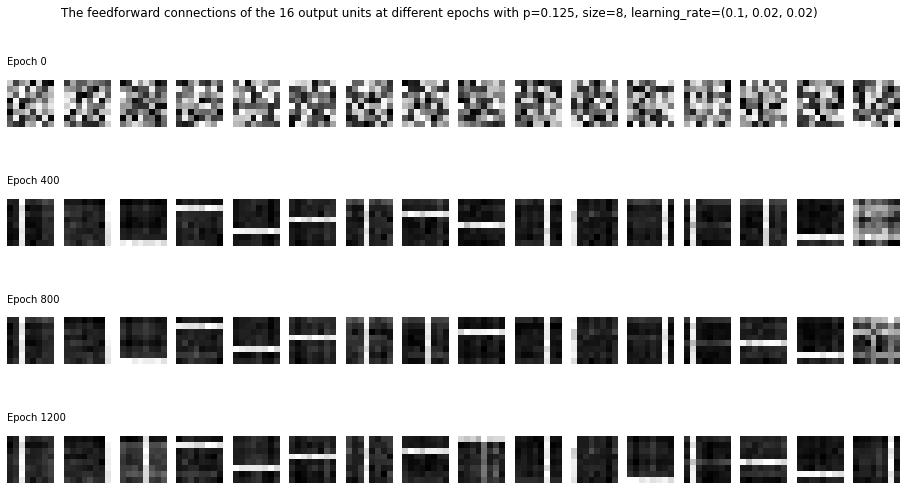

Running simulation with p=0.125, size=8, learning_rate=(0.2, 0.04, 0.04)


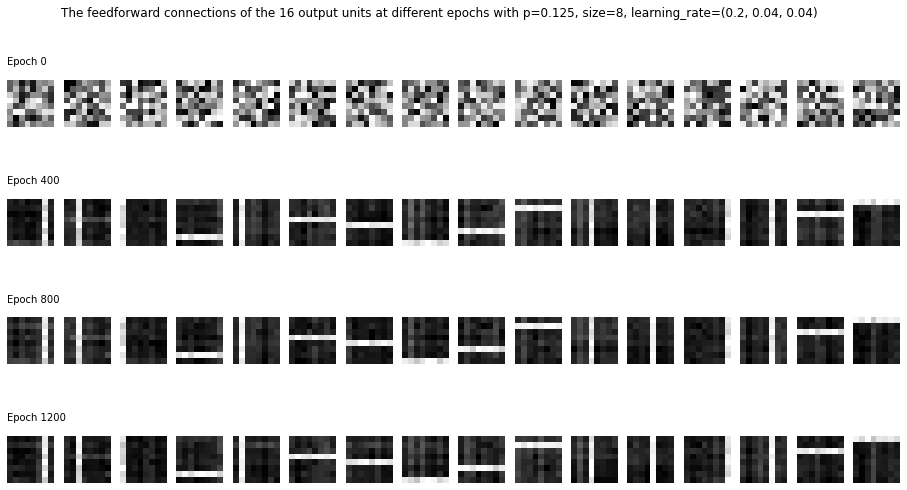

Running simulation with p=0.125, size=8, learning_rate=(0.3, 0.06, 0.06)


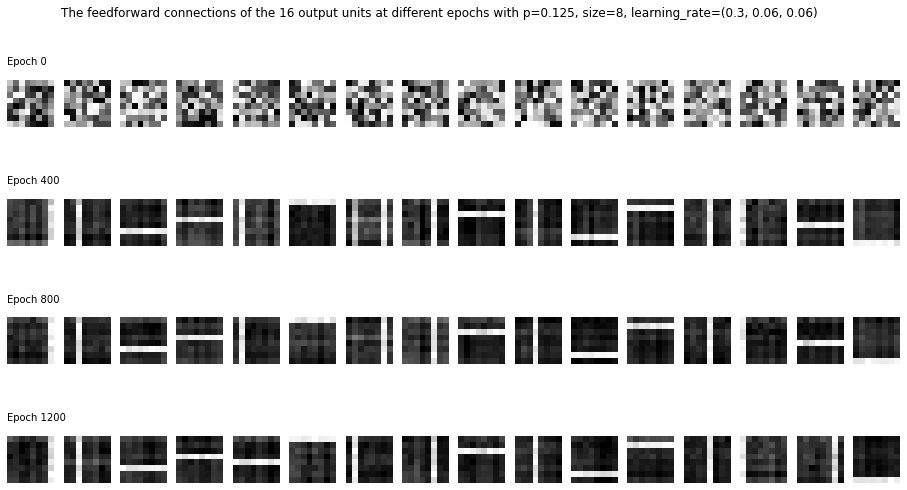

Running simulation with p=0.125, size=16, learning_rate=(0.1, 0.02, 0.02)


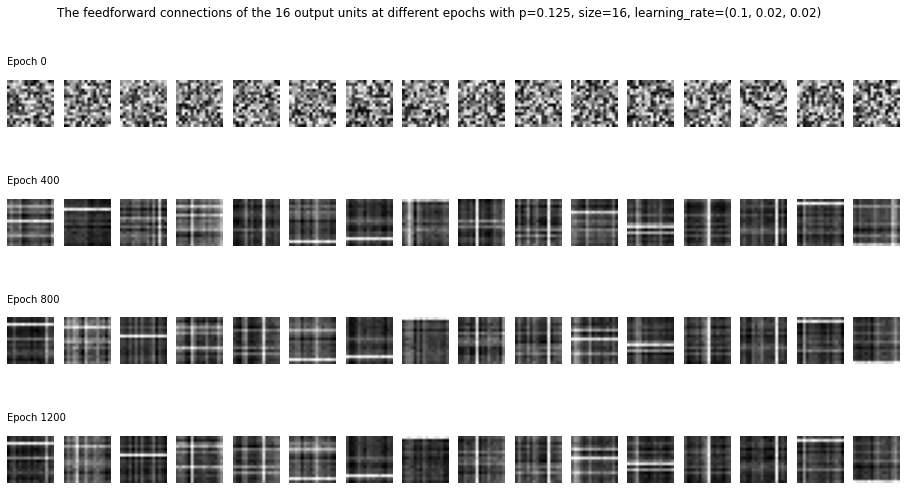

Running simulation with p=0.125, size=16, learning_rate=(0.2, 0.04, 0.04)


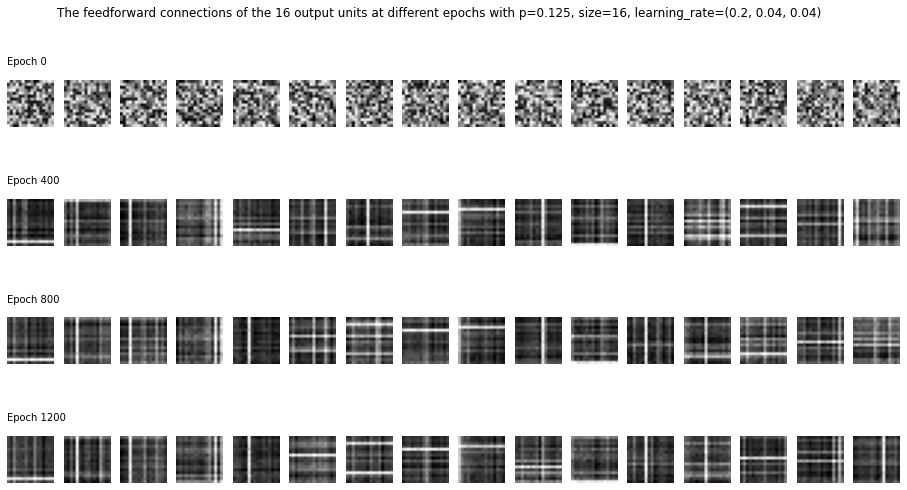

Running simulation with p=0.125, size=16, learning_rate=(0.3, 0.06, 0.06)


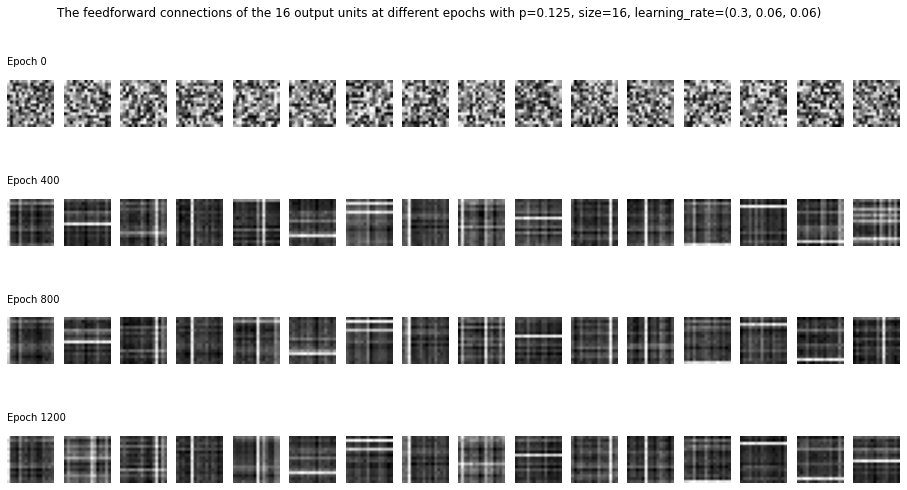

Running simulation with p=0.25, size=8, learning_rate=(0.1, 0.02, 0.02)


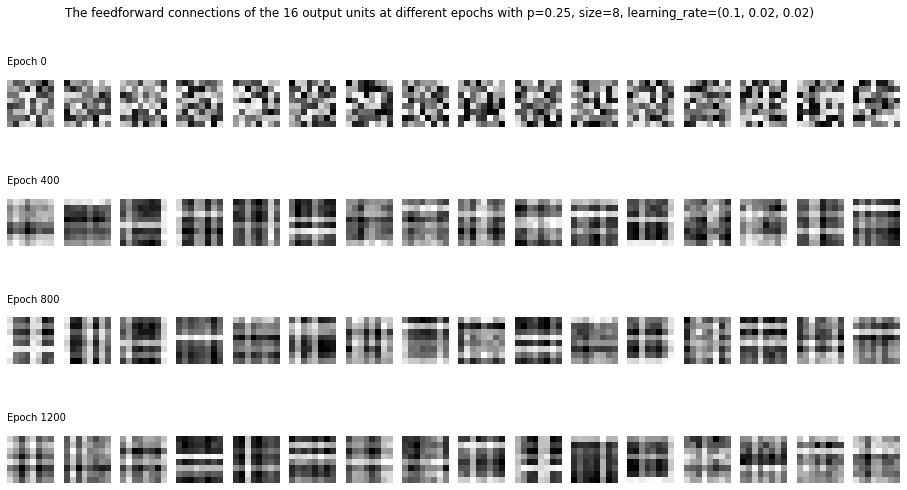

Running simulation with p=0.25, size=8, learning_rate=(0.2, 0.04, 0.04)


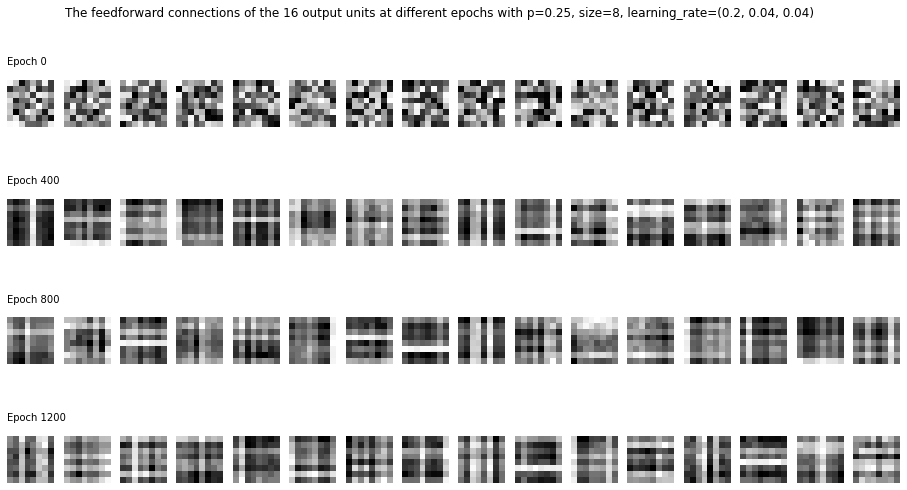

Running simulation with p=0.25, size=8, learning_rate=(0.3, 0.06, 0.06)


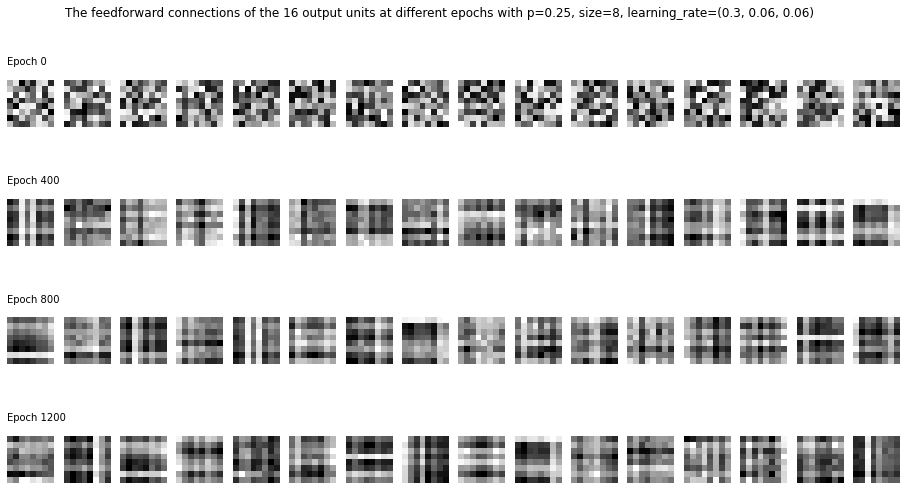

Running simulation with p=0.25, size=16, learning_rate=(0.1, 0.02, 0.02)


/var/folders/wz/tsqbtlsx4klfg4yvd9hgr2h80000gn/T/ipykernel_4316/4223518967.py:19: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-self.lambd*u))


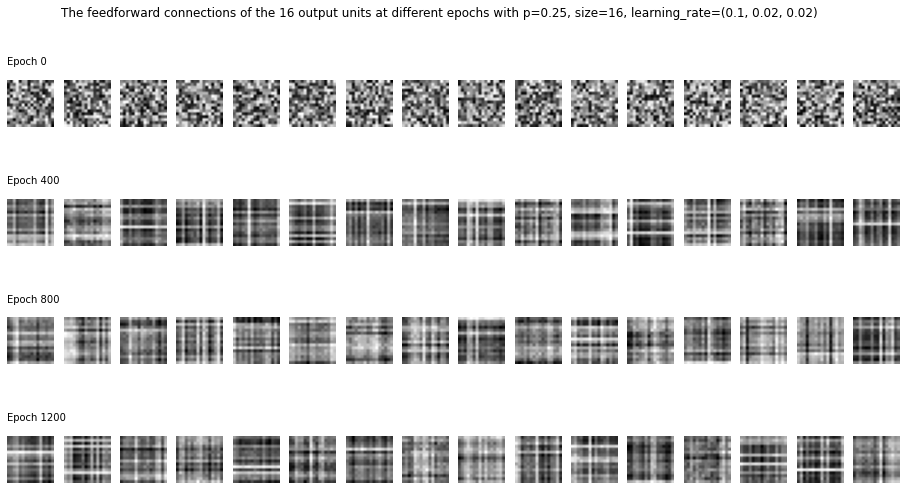

Running simulation with p=0.25, size=16, learning_rate=(0.2, 0.04, 0.04)


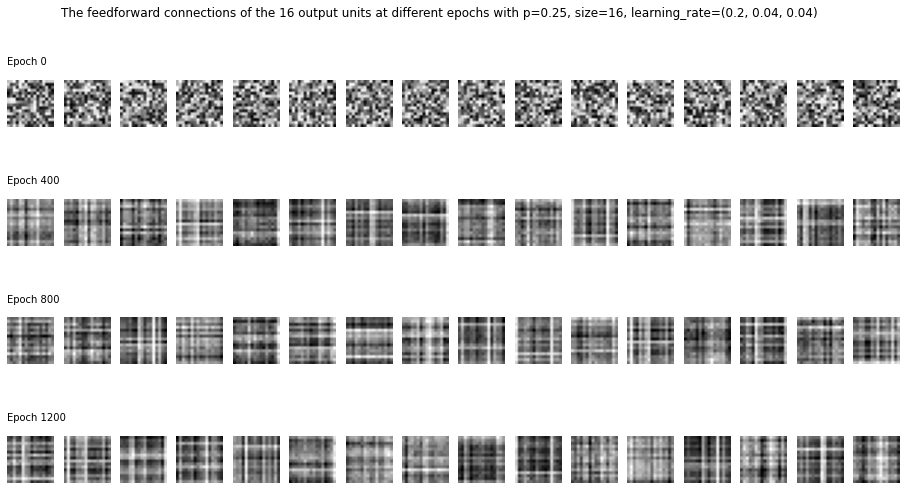

Running simulation with p=0.25, size=16, learning_rate=(0.3, 0.06, 0.06)


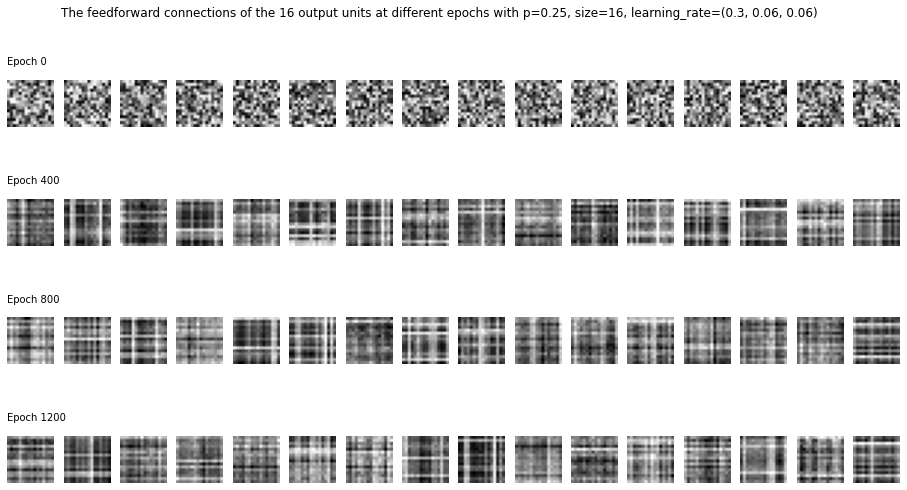

Running simulation with p=0.5, size=8, learning_rate=(0.1, 0.02, 0.02)


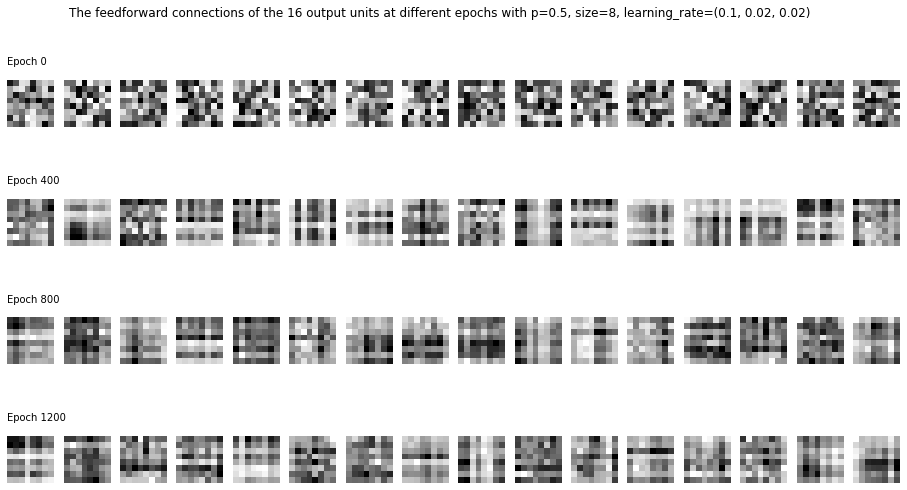

Running simulation with p=0.5, size=8, learning_rate=(0.2, 0.04, 0.04)


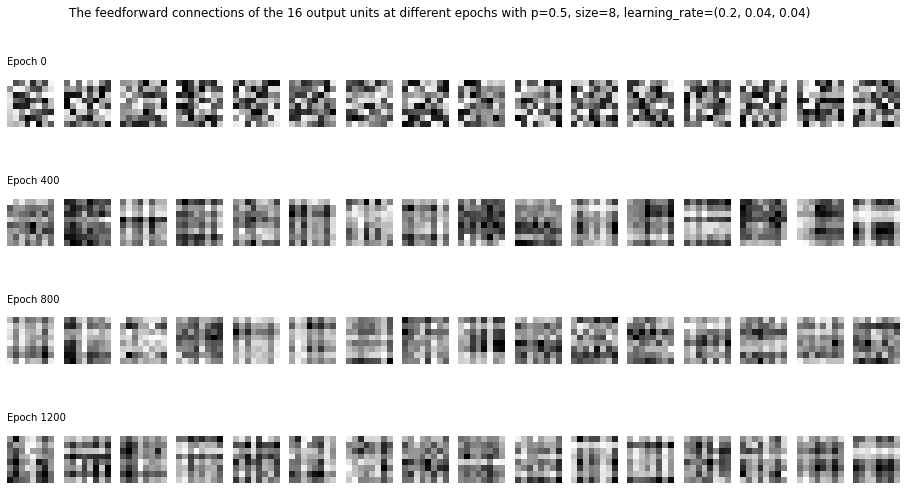

Running simulation with p=0.5, size=8, learning_rate=(0.3, 0.06, 0.06)


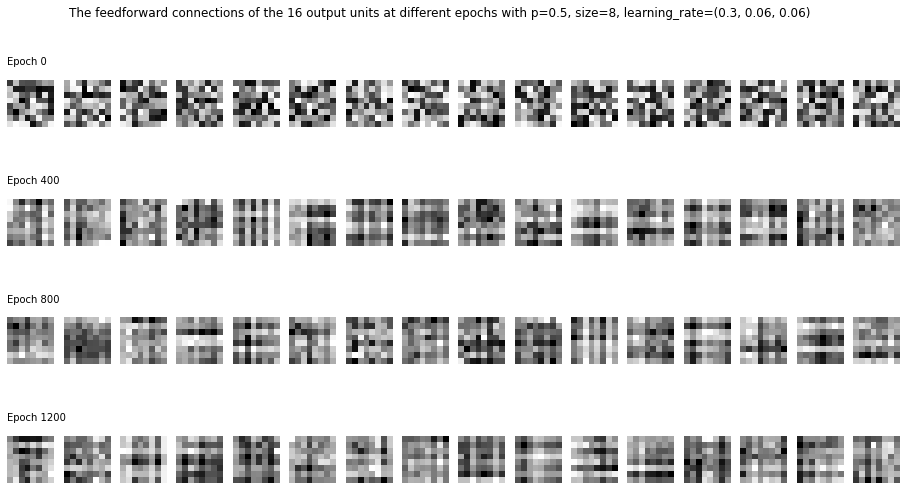

Running simulation with p=0.5, size=16, learning_rate=(0.1, 0.02, 0.02)


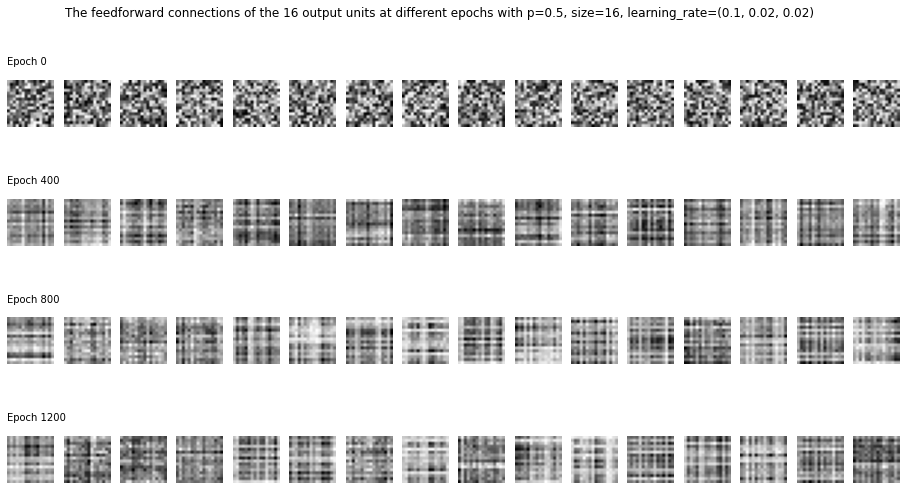

Running simulation with p=0.5, size=16, learning_rate=(0.2, 0.04, 0.04)


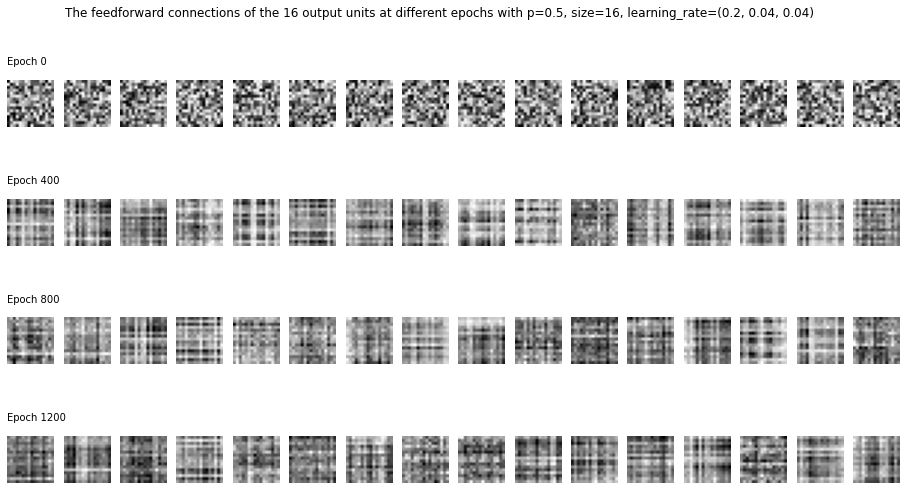

Running simulation with p=0.5, size=16, learning_rate=(0.3, 0.06, 0.06)


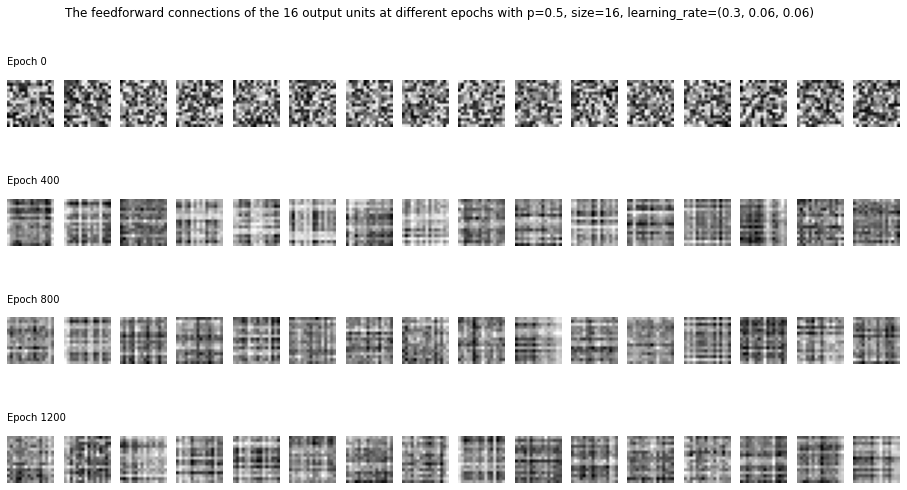

In [6]:
probabilities = [1/8, 1/4, 1/2]
sizes = [8, 16]
learning_rates = [(0.1, 0.02, 0.02), (0.2, 0.04, 0.04), (0.3, 0.06, 0.06)]  # (alpha, beta, gamma)

for p in probabilities:
    for size in sizes:
        for learning_rate in learning_rates:
            print(f"Running simulation with p={p}, size={size}, learning_rate={learning_rate}")
            
            data = generate_bars(num_samples, size, p)
            network = FoldiakNetwork(m=size*size, n=16, alpha=learning_rate[0], beta=learning_rate[1], gamma=learning_rate[2])
            input_patterns = data.reshape(num_samples, -1)
            network.train(input_patterns)
            display_epochs = [0, 400, 800, 1200]
            #display_epochs = [1200]

            display_indices = [epoch * num_samples for epoch in display_epochs]

            fig, axs = plt.subplots(len(display_epochs), 16, figsize=(16, len(display_epochs)*2))
            plt.subplots_adjust(hspace=0.5)

            for i, index in enumerate(display_indices):
                for j in range(16):
                    axs[i, j].imshow(network.q_history[index][j].reshape(int(np.sqrt(network.m)), int(np.sqrt(network.m))), cmap='gray')
                    axs[i, j].axis('off')

                axs[i, 0].text(0, 1.5, f'Epoch {display_epochs[i]}', transform=axs[i, 0].transAxes, va='top')

            plt.suptitle(f'The feedforward connections of the 16 output units at different epochs with p={p}, size={size}, learning_rate={learning_rate}')
            plt.show()


## Heirarchy

In [7]:
class StackedFoldiakNetwork:
    def __init__(self, sizes, alpha=0.1, beta=0.02, gamma=0.02, lambd=10, p=1/8, num_epochs=1200):
        self.networks = [FoldiakNetwork(m=n**2, n=16, alpha=alpha, beta=beta, gamma=gamma, lambd=lambd, p=p, num_epochs=num_epochs)
                         for n in sizes]

    def train(self, X):
        for network in self.networks:
            network.train(X)
            X = np.array([network.transform(x) for x in X])

In [8]:
def generate_single_shape(size, shape):
    image = np.zeros((size, size))
    if shape == "square":
        start = size // 4
        end = size - start
        image[start:end, start:end] = 1
    elif shape == "cross":
        image[size // 2, :] = 1
        image[:, size // 2] = 1
    return image

def generate_grid(num_samples, grid_size, cell_size):
    image_size = grid_size * cell_size
    data = np.zeros((num_samples, image_size, image_size))
    for sample in range(num_samples):
        for i in range(grid_size):
            for j in range(grid_size):
                shape = "square" if np.random.uniform(0, 1) < 0.5 else "cross"

                cell_image = generate_single_shape(cell_size, shape)

                data[sample, i*cell_size:(i+1)*cell_size, j*cell_size:(j+1)*cell_size] = cell_image

    return data
num_samples = 100
grid_size = 4
cell_size = 16


data = generate_grid(num_samples, grid_size, cell_size)
input_patterns = data.reshape(num_samples, -1)


input_size = grid_size * cell_size  
output_size = grid_size  

network = StackedFoldiakNetwork(sizes=[input_size, output_size])
network.train(input_patterns)

/var/folders/wz/tsqbtlsx4klfg4yvd9hgr2h80000gn/T/ipykernel_4316/4223518967.py:19: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-self.lambd*u))


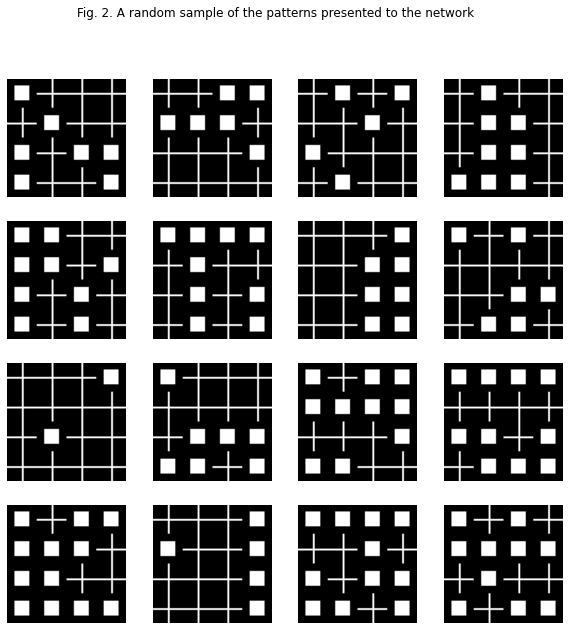

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(data[i], cmap='gray')
    plt.axis('off')
plt.suptitle('Fig. 2. A random sample of the patterns presented to the network')
plt.show()

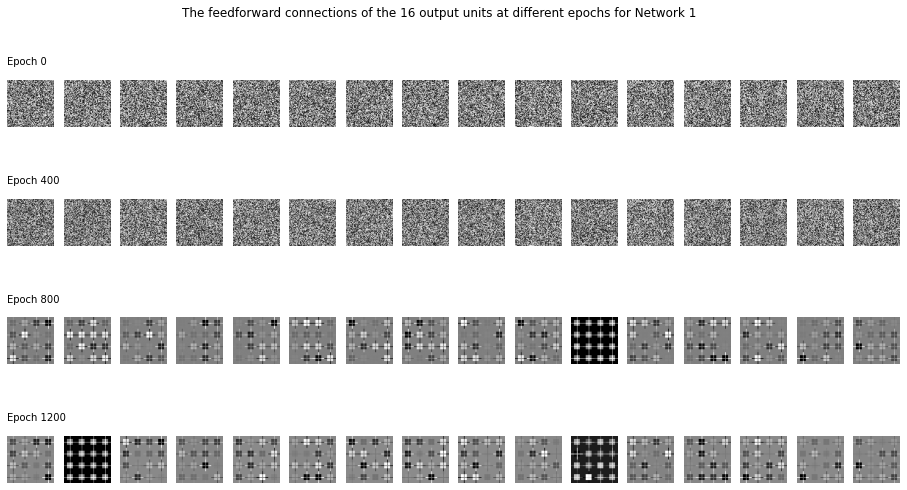

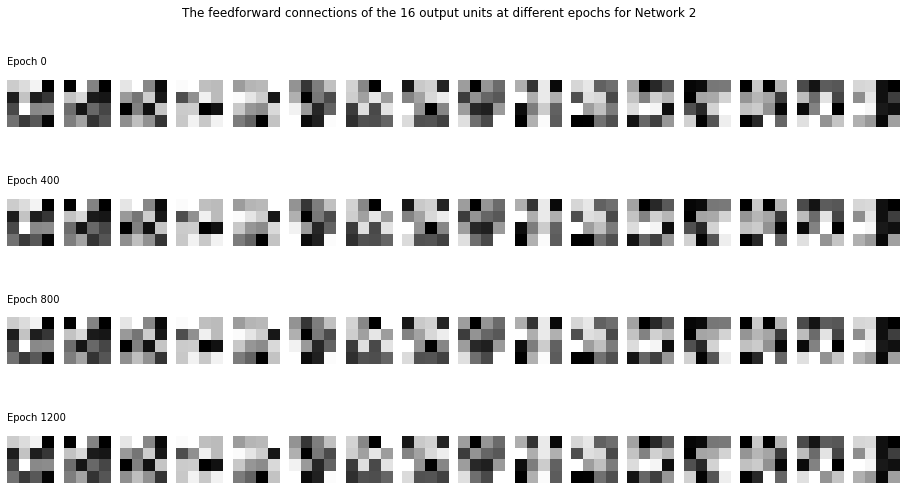

In [10]:

for idx, network in enumerate(network.networks):
    display_epochs = [0, 400, 800, 1200]
    display_indices = [epoch * num_samples for epoch in display_epochs]
    fig, axs = plt.subplots(len(display_epochs), network.n, figsize=(16, len(display_epochs)*2))
    plt.subplots_adjust(hspace=0.5)
    for i, index in enumerate(display_indices):

        for j in range(network.n):

            axs[i, j].imshow(network.q_history[index][j].reshape(int(np.sqrt(network.m)), int(np.sqrt(network.m))), cmap='gray')
            axs[i, j].axis('off')

        axs[i, 0].text(0, 1.5, f'Epoch {display_epochs[i]}', transform=axs[i, 0].transAxes, va='top')

    plt.suptitle(f'The feedforward connections of the {network.n} output units at different epochs for Network {idx+1}')
    plt.show()

## MNIST

In [11]:
import numpy as np
import pickle
import gzip
import urllib.request


url = "https://s3.amazonaws.com/img-datasets/mnist.pkl.gz"
filename = "mnist.pkl.gz"
urllib.request.urlretrieve(url, filename)
with gzip.open('mnist.pkl.gz', 'rb') as f:
    (X_train, y_train), (X_test, y_test) = pickle.load(f, encoding='latin1')


mask_train = (y_train == 1) | (y_train == 5)
mask_test = (y_test == 1) | (y_test == 5)
X_train = X_train[mask_train]
y_train = y_train[mask_train]
X_test = X_test[mask_test]
y_test = y_test[mask_test]


X_train = X_train / 255.0
X_test = X_test / 255.0


n_samples_per_class = 250  # computation constraint
indices_train_class_1 = np.random.choice(np.where(y_train == 1)[0], n_samples_per_class, replace=False)
indices_train_class_5 = np.random.choice(np.where(y_train == 5)[0], n_samples_per_class, replace=False)
indices_test_class_1 = np.random.choice(np.where(y_test == 1)[0], n_samples_per_class, replace=False)
indices_test_class_5 = np.random.choice(np.where(y_test == 5)[0], n_samples_per_class, replace=False)


indices_train = np.concatenate([indices_train_class_1, indices_train_class_5])
np.random.shuffle(indices_train)
indices_test = np.concatenate([indices_test_class_1, indices_test_class_5])
np.random.shuffle(indices_test)

X_train = X_train[indices_train]
y_train = y_train[indices_train]
X_test = X_test[indices_test]
y_test = y_test[indices_test]


m = 28 * 28  
n = 4  


foldiak_network = FoldiakNetwork(m=m, n=n)


input_patterns = X_train.reshape(len(X_train), -1)


foldiak_network.train(input_patterns)


X_train_transformed = np.array([foldiak_network.update(x) for x in input_patterns])
X_test_transformed = np.array([foldiak_network.update(x) for x in X_test.reshape(len(X_test), -1)])




In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


lr_transformed = LogisticRegression()
lr_transformed.fit(X_train_transformed, y_train)

y_pred_transformed = lr_transformed.predict(X_test_transformed)


accuracy_transformed = accuracy_score(y_test, y_pred_transformed)

print("Accuracy on transformed data: ", accuracy_transformed)


Accuracy on transformed data:  0.676


In [13]:
from sklearn.decomposition import PCA, FastICA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)


ica = FastICA(n_components=n, random_state=0)
X_train_ica = ica.fit_transform(X_train_flat)
X_test_ica = ica.transform(X_test_flat)


lr_pca = LogisticRegression()
lr_ica = LogisticRegression()


lr_pca.fit(X_train_pca, y_train)
lr_ica.fit(X_train_ica, y_train)


y_pred_pca = lr_pca.predict(X_test_pca)
y_pred_ica = lr_ica.predict(X_test_ica)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
accuracy_ica = accuracy_score(y_test, y_pred_ica)


print("Accuracy on PCA transformed data: ", accuracy_pca)
print("Accuracy on ICA transformed data: ", accuracy_ica)



Accuracy on PCA transformed data:  0.972
Accuracy on ICA transformed data:  0.968


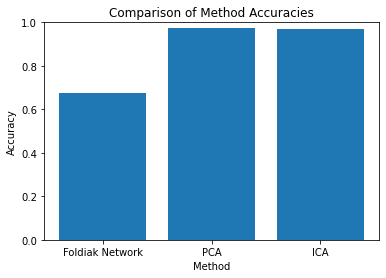

In [14]:
import matplotlib.pyplot as plt


accuracies = [accuracy_transformed, accuracy_pca, accuracy_ica]


methods = ['Foldiak Network', 'PCA', 'ICA']


plt.bar(methods, accuracies)
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('Comparison of Method Accuracies')
plt.ylim([0, 1])  
plt.show()
